In [ ]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Bag of Words (BoW) Model

The Bag of Words model is a simple text representation technique that transforms each document into a fixed-length vector of integers. It's widely used in natural language processing (NLP) for various tasks.

## Introduction

The core idea behind the Bag of Words model is to represent text documents as a collection of words and their frequency of occurrence in the document. It ignores the order of words and focuses solely on the presence or absence of words in the document.

## Example

Let's take two sample sentences:

1. "John likes to watch movies. Mary likes movies too."
2. "John also likes to watch football games. Mary hates football."

We can represent these sentences using the Bag of Words model by creating a vocabulary and counting word occurrences in each sentence.

```python
# Sample Sentences
sentence1 = "John likes to watch movies. Mary likes movies too."
sentence2 = "John also likes to watch football games. Mary hates football."

# Vocabulary
vocabulary = ["John", "likes", "to", "watch", "movies", "Mary", "too", "also", "football", "games", "hates"]

# BoW Vectors
bow_vector1 = [1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0]
bow_vector2 = [1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1]
```

## Weaknesses

* They lose all information about word order. It can be solved using n-gram models. n-gram models consider word phrases of length n to represent documents as fixed-length vectors to capture local word order but suffer from data sparsity and high dimensionality.

* The model does not attempt to learn the meaning of the underlying words, and as a consequence, the distance between vectors doesn’t always reflect the difference in meaning.

**Solution**: **Word2Vec**

In [ ]:
text = [
    'Call be Selbie, the ruthless ruler of the dangerous city, Bermingham.',
    'I like playing call of duty a lot.',
    'I was singing twinkle twinkle little star'
]
print(text)

['Call be Selbie, the ruthless ruler of the dangerous city, Bermingham.', 'I like playing call of duty a lot.', 'I was singing twinkle twinkle little star']


In [ ]:
def preprocess_text(list_of_texts):

    #lowercase the text
    text = list_of_texts.lower()
    text = re.sub(r'[^a-zA-Z0-9]',' ', text)

    tokens = word_tokenize(text)
    tokens = [i_token for i_token in tokens if i_token not in stopwords.words("english")]
    #stemmer
    stemmed = [PorterStemmer().stem(i_token) for i_token in tokens]

    #appy lemmatizer
    lemmtized = [WordNetLemmatizer().lemmatize(i_token, pos="n") for i_token in stemmed]
    lemmtized = [WordNetLemmatizer().lemmatize(i_token, pos="v") for i_token in lemmtized]

    return lemmtized

In [ ]:
text = " ".join(text)
print(text)

Call be Selbie, the ruthless ruler of the dangerous city, Bermingham. I like playing call of duty a lot. I was singing twinkle twinkle little star


In [ ]:
tokens = preprocess_text(text)

In [ ]:
tokens

['call',
 'selbi',
 'ruthless',
 'ruler',
 'danger',
 'citi',
 'bermingham',
 'like',
 'play',
 'call',
 'duti',
 'lot',
 'sing',
 'twinkl',
 'twinkl',
 'littl',
 'star']

In [ ]:
vocabularies = np.unique(tokens)

In [ ]:
vocabularies

array(['bermingham', 'call', 'citi', 'danger', 'duti', 'like', 'littl',
       'lot', 'play', 'ruler', 'ruthless', 'selbi', 'sing', 'star',
       'twinkl'], dtype='<U10')

# Document Term Matrix

## Introduction

- **DTM** is a vital tool in NLP.
- It's a numerical matrix representing term frequencies in documents.

## Components

1. **Documents**: Rows represent documents.
2. **Terms**: Columns are unique terms in the corpus.
3. **Frequency Values**: Entries show term occurrences.

## Creating a DTM

1. **Text Preprocessing**: Tokenization, lowercase, stopwords, stemming.
2. **Build Vocabulary**: List of unique terms.
3. **Count Frequencies**: Calculate term counts.
4. **Optional Normalization**: Apply TF-IDF or other methods.
5. **Construct DTM**: Combine frequencies into a matrix.

## Applications

- **Text Classification**: Input for ML models.
- **Topic Modeling**: Discover latent topics.
- **Clustering**: Group similar documents.
- **Information Retrieval**: Match terms for retrieval.
- **Sentiment Analysis**: Analyze sentiment based on terms.


In [ ]:
#document term matrix
def document_term_matrix(list_of_new_sentence, vocabularies):
    #Initializing an empty list for all the document term matrix
    list_of_document_term_matrix = []

    for i_new_sentence in list_of_new_sentence:

        #preprocess the sentence
        new_tokens = preprocess_text(i_new_sentence)

        #initializing a zeros array
        dtm = np.zeros(len(vocabularies))

        for i_token in new_tokens:
            for index, i_vocab in enumerate(vocabularies):
                if i_vocab == i_token:
                    dtm[index] += 1

        #append the document term matrix to the list of document term matrix
        list_of_document_term_matrix.append(dtm)

    #convert to dataframe
    dtn = pd.DataFrame(data=list_of_document_term_matrix, index = [list_of_new_sentence], columns= vocabularies)

    return dtn

In [ ]:
list_of_new_sentences = [
    'Call be Selbie, the ruthless ruler of the dangerous city, Bermingham.',
    'I like playing call of duty a lot.',
    'I was singing twinkle twinkle little star'
]
print(list_of_new_sentences)

['Call be Selbie, the ruthless ruler of the dangerous city, Bermingham.', 'I like playing call of duty a lot.', 'I was singing twinkle twinkle little star']


In [ ]:
stm = document_term_matrix(list_of_new_sentences, vocabularies)

In [ ]:
stm

,bermingham,call,citi,danger,duti,like,littl,lot,play,ruler,ruthless,selbi,sing,star,twinkl
"Call be Selbie, the ruthless ruler of the dangerous city, Bermingham.",1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
I like playing call of duty a lot.,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
I was singing twinkle twinkle little star,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


# TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF is a text vectorization technique widely used in natural language processing (NLP) and information retrieval to represent the importance of terms in a document relative to a corpus. It combines two fundamental concepts: "term frequency" and "inverse document frequency."

## Advantages of TF-IDF

### 1. Importance Weights

- **Term Relevance**: TF-IDF assigns higher weights to terms that are important within a document but not too common across all documents. This helps in identifying the significance of terms in context.

### 2. Dimension Reduction

- **Feature Selection**: TF-IDF reduces the dimensionality of the text data by focusing on important terms, making it more efficient for machine learning algorithms.

### 3. Improved Information Retrieval

- **Enhanced Search**: In information retrieval systems, TF-IDF improves search results by ranking documents based on term relevance.

### 4. Handles Variable Length Texts

- **Scalability**: TF-IDF handles documents of varying lengths without requiring fixed-length vectors.

## Weaknesses of TF-IDF

### 1. Lack of Semantics

- **No Semantic Understanding**: TF-IDF treats terms as independent units and doesn't capture the semantic relationships between words.

### 2. Sensitivity to Document Length

- **Document Length Bias**: Longer documents may have higher TF-IDF scores simply due to their length, which can lead to bias in some applications.

### 3. Limited Context

- **Local Context**: TF-IDF only considers the local context within a document and doesn't capture global context or word order.

### 4. Handling Synonyms

- **Synonym Challenge**: Different terms with similar meanings may not be treated equivalently unless they are explicitly linked in the preprocessing.

Despite its limitations, TF-IDF remains a valuable tool for text analysis, information retrieval, and text-based machine learning tasks, especially when paired with other NLP techniques to address its weaknesses.


In [ ]:
#cOPYING THE DOCUMENT-TERM MATRIX
tfidf = stm.copy()

#divide each item in a column to its corresponding document frequency
for index_i, i_col_name in enumerate(tfidf.columns):
    i_col = tfidf.iloc[:, index_i]
    i_col_sum = sum(i_col)

    #iterate through items in a column
    for index_2, i_tem in enumerate(i_col):
        tfidf.iloc[index_2, index_i] /= i_col_sum

In [ ]:
tfidf

,bermingham,call,citi,danger,duti,like,littl,lot,play,ruler,ruthless,selbi,sing,star,twinkl
"Call be Selbie, the ruthless ruler of the dangerous city, Bermingham.",1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
I like playing call of duty a lot.,0.0,0.5,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
I was singing twinkle twinkle little star,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


# One-Hot Encoding

One-Hot Encoding is a popular technique used in machine learning and natural language processing (NLP) to represent categorical data numerically. It converts categorical variables into binary vectors with 1s and 0s, indicating the presence or absence of each category.

## Advantages of One-Hot Encoding

### 1. Simplicity and Clarity

- **Interpretability**: One-Hot Encoding is intuitive and easy to understand. Each category gets its own binary feature, making it clear and interpretable.

### 2. No Assumptions About Order

- **No Implicit Order**: It does not assume any inherent order or ranking among categories, making it suitable for nominal data.

### 3. Compatibility with Machine Learning Algorithms

- **Algorithm Compatibility**: Most machine learning algorithms, including linear models and tree-based algorithms, work well with one-hot encoded data.

### 4. Handling Missing Data

- **Missing Data Handling**: It can handle missing data by simply using a vector of all 0s to indicate the absence of any category.

## Weaknesses of One-Hot Encoding

### 1. High Dimensionality

- **Curse of Dimensionality**: One-Hot Encoding can lead to high-dimensional data, especially when dealing with categorical features with many unique categories. This can slow down algorithms and lead to overfitting.

### 2. Loss of Information

- **Information Loss**: It discards information about the relationships or similarities between categories. All categories are treated as independent, which may not be suitable for some applications.

### 3. Sparse Data

- **Sparse Matrix**: The resulting one-hot encoded matrix is often sparse, with mostly 0s, which can be memory-inefficient.

### 4. Handling New Categories

- **New Categories**: It requires special handling when new categories appear in the data during testing or deployment, as the encoding scheme must be updated.

Despite its limitations, One-Hot Encoding is a valuable tool for handling categorical data, and its advantages in terms of interpretability and compatibility with machine learning algorithms make it a common choice in various applications. It is essential to consider the trade-offs and potential challenges when using One-Hot Encoding in a specific context.


In [ ]:
def one_hot_encoding(vocabularies):

    #Initializing a zeros array
    one_hot_encoded = np.zeros([len(vocabularies), len(vocabularies)])

    #convert to dataframe
    one_hot_encoded = pd.DataFrame(data = one_hot_encoded, index = [vocabularies], columns = [vocabularies])

    #Set 1 if the word exist in the corresponding place
    for i_vocab in vocabularies:
        one_hot_encoded.loc[i_vocab,i_vocab] = 1
    return one_hot_encoded

In [ ]:
one_hot_encoded = one_hot_encoding(vocabularies)

In [ ]:
one_hot_encoded

,bermingham,call,citi,danger,duti,like,littl,lot,play,ruler,ruthless,selbi,sing,star,twinkl
bermingham,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
call,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
citi,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
danger,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
duti,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
like,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
littl,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
play,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ruler,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
one_hot_encoded.loc["like"].values

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# Word2Vec

Word2Vec is a popular natural language processing (NLP) technique used for word embeddings. It converts words into high-dimensional vectors, allowing words with similar meanings to have similar vector representations.

## Advantages of Word2Vec

### 1. Semantic Understanding

- **Captures Semantics**: Word2Vec captures semantic relationships between words, allowing it to represent words with similar meanings as vectors close to each other in the vector space.

### 2. Dimension Reduction

- **Reduced Dimensionality**: It reduces the dimensionality of word representations, making it efficient for NLP tasks compared to high-dimensional one-hot encoded vectors.

### 3. Contextual Information

- **Contextual Awareness**: Word2Vec considers the context in which words appear, enabling it to understand word meanings in different contexts.

### 4. Better Generalization

- **Improved Generalization**: Word2Vec-generated embeddings often lead to better performance in downstream NLP tasks like sentiment analysis and named entity recognition.

## Weaknesses of Word2Vec

### 1. Fixed Vocabulary

- **Limited Vocabulary**: Word2Vec models have a fixed vocabulary, meaning rare or out-of-vocabulary words may not be represented effectively.

### 2. Lack of Rare Word Embeddings

- **Rare Words**: Rare words may have less accurate representations due to limited occurrences in the training data.

### 3. Context Window Size

- **Context Window**: The choice of context window size can impact the quality of embeddings. Small windows may miss long-range relationships, while large windows may dilute word meanings.

### 4. Model Complexity

- **Training Complexity**: Training Word2Vec models can be computationally intensive, especially on large corpora.

Word2Vec remains a valuable tool in NLP, enabling semantic understanding and efficient word representations. It has paved the way for numerous advancements in natural language processing. Understanding its strengths and limitations is crucial for its effective use in NLP applications.



In [ ]:
from urllib import request
import bs4
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
!pip install html5lib
!pip install lxml

In [ ]:
data = request.urlopen("https://en.wikipedia.org/wiki/Artificial_intelligence").read()

#improve the html tags
data = bs4.BeautifulSoup(data, "html.parser")

#get all paragraphs
paragraphs = data.find_all("p")

#convert list of bs4 lines into list of strings
article = [i.text.strip() for i in paragraphs]

In [ ]:
preprocessed_tokens = [preprocess_text(i) for i in article]

In [ ]:
preprocessed_tokens

[[],
 ['artifici',
  'intellig',
  'ai',
  'intellig',
  'perceiv',
  'synthes',
  'infer',
  'inform',
  'demonstr',
  'machin',
  'oppos',
  'intellig',
  'display',
  'non',
  'human',
  'anim',
  'human',
  'exampl',
  'task',
  'do',
  'includ',
  'speech',
  'recognit',
  'comput',
  'vision',
  'translat',
  'natur',
  'languag',
  'well',
  'map',
  'input'],
 ['ai',
  'applic',
  'includ',
  'advanc',
  'web',
  'search',
  'engin',
  'e',
  'g',
  'googl',
  'search',
  'recommend',
  'system',
  'use',
  'youtub',
  'amazon',
  'netflix',
  'understand',
  'human',
  'speech',
  'siri',
  'alexa',
  'self',
  'drive',
  'car',
  'e',
  'g',
  'waymo',
  'autom',
  'decis',
  'make',
  'compet',
  'highest',
  'level',
  'strateg',
  'game',
  'system',
  'chess',
  'go',
  '1'],
 ['machin',
  'becom',
  'increasingli',
  'capabl',
  'task',
  'consid',
  'requir',
  'intellig',
  'often',
  'remov',
  'definit',
  'ai',
  'phenomenon',
  'know',
  'ai',
  'effect',
  '2',
  

Two types:

- **Skip gram**
    
    Given a target, it predicts the contexts associated to it. At first, one hot encoding of the target is done which is then fed into neural network and soft-max function is applied to predict contexts.
    
- **Continuous bag of words**
    
    Given contexts, it predicts the target. At first, one hot encoded contexts are fed into the neural network which is applied a soft-max function. It predicts the target associated to contexts.
    
    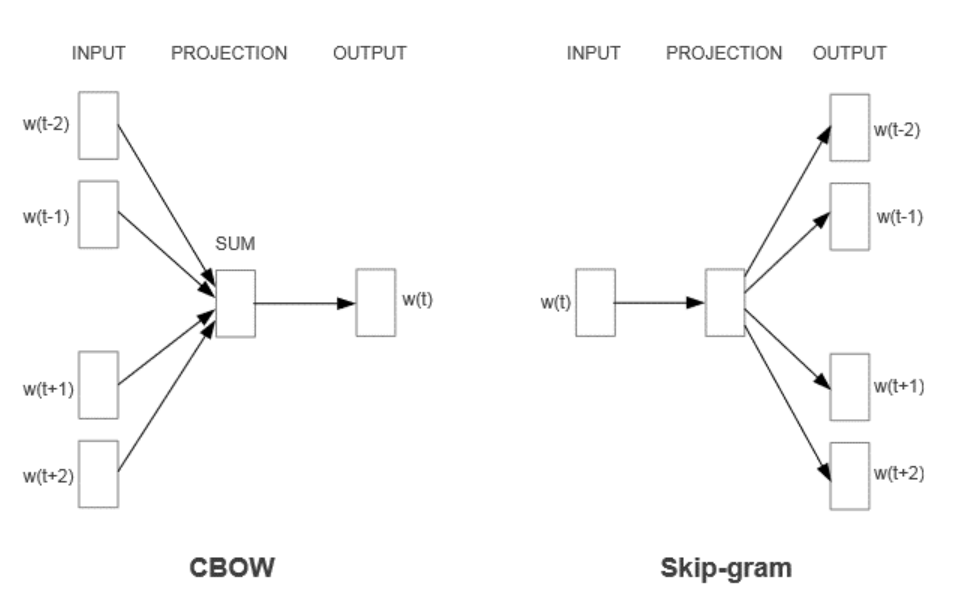

In [ ]:
#Apply word2Vec (cBOW) to our processed data
word2vec = Word2Vec(preprocessed_tokens,
                    sg=0,
                    vector_size = 200,
                    window = 5,
                    min_count = 2,
                    epochs = 5)

In [ ]:
#Get all vocabularies
vocabularies = word2vec.wv

In [ ]:
v1 = word2vec.wv['artifici']

In [ ]:
v1

array([ 4.64094745e-04, -5.08764107e-03,  1.66370824e-03,  1.60986197e-03,
        5.83336502e-03, -1.46264001e-03, -2.08575255e-03,  7.54519599e-03,
        1.23912847e-04,  1.33767282e-03, -3.92607506e-03, -6.21260516e-03,
       -4.42999974e-03,  6.01584511e-03, -4.90511674e-03,  2.58610561e-03,
       -5.08543430e-03,  3.27822141e-04, -9.17160767e-04, -7.47374352e-03,
        5.19167492e-03,  2.16707564e-03,  1.49909325e-03,  2.43359199e-03,
        2.84425594e-04,  2.92097381e-03,  2.93877302e-03, -7.26343598e-03,
       -3.64324567e-03,  1.09590546e-04,  2.72129313e-03, -1.95262057e-03,
        1.59570505e-03, -3.87849961e-03,  1.71696465e-03,  3.46128689e-03,
        3.92658031e-03, -2.78212712e-03, -5.06014377e-03, -7.04482058e-03,
       -2.02313624e-03, -3.63752292e-03, -2.63935793e-03,  4.15577367e-03,
        6.75959978e-03,  1.21441507e-03, -3.70365242e-03, -3.59735801e-03,
        5.30667976e-03,  2.97671603e-03, -1.46186817e-03, -4.19936283e-03,
       -1.70419959e-03,  

In [ ]:
sim_words = word2vec.wv.similar_by_word("intellig",topn=10)

In [ ]:
sim_words

[('ai', 0.4771723747253418),
 ('human', 0.4464598596096039),
 ('use', 0.4456796646118164),
 ('input', 0.4322156310081482),
 ('comput', 0.4079076945781708),
 ('may', 0.39933812618255615),
 ('agent', 0.3831430673599243),
 ('network', 0.3827890455722809),
 ('mind', 0.3808494806289673),
 ('would', 0.3688828647136688)]

In [ ]:
#Get words that are similar to human but dissimilar to machine
result = word2vec.wv.most_similar(positive=["human"], negative = ["machin"])
result

[('whether', 0.2402685135602951),
 ('futur', 0.22539667785167694),
 ('artifici', 0.20639830827713013),
 ('race', 0.20545828342437744),
 ('inspir', 0.18519648909568787),
 ('capabl', 0.18086472153663635),
 ('person', 0.16968011856079102),
 ('comput', 0.1606058031320572),
 ('feel', 0.15891115367412567),
 ('discoveri', 0.15303699672222137)]

In [ ]:
# #Applying PCA to our applied vectors

# x = word2vec.wv

# #Applying  PCA
# pca = PCA(n_components=2)
# result = pca.fit_transform(x)

# plt.figure(figsize=(50,50))
# plt.scatter(result[:,0],result[:,1])
# words = list(word2vec.wv)

# for i, word in enumerate(words):
#     plt.annotate(word, xy = (result[i,0], result[i,1]))
